# ANOVA

One-way ANOVA means "Analysis of Variance". It is an omnibus test, and parametric. 

* **Omnibus** tests are a kind of stastical test, they test whether the explained variance in a set of data is significantly greater than the unexplained variance. Forms of ominbus testing includes the **F-Test** and the **Chi-squared test**.


* **Parametric** models are models based on assumptions of the population such as mean, which is defined as a parameter. 

An ANOVA test is said to be a one-way test if it is testing a single variable, an ANOVA test can be two-way or a two-factor test if it tests two variables. This is usually refered to as a ANCOVA where the "C" stands for covariate. With more than two factors, the test is generally referred to as MANOVA or Multiple Analysis of Variance. 

### Parametric Test Assumptions of ANOVA

* Population distributions are normal
* Samples have equal variances
* Independence

### F-statistic

The test statistic for ANOVA is the F-statistic and compares the mean square between samples to the mean square within samples. 

$$
    F = \frac{MS_B}{MS_W}
$$

Where, 

$$
 MS_B = \frac{\text{Sum of square between sample} (SS_b)}{k-1} \\
 MS_W = \frac{\text{Sum of square between sample} (SS_w)}{n_T-k}
\\\\
$$


* k is number of groups
* $n_T$ is the total number of observations

Similar to the t-test and the t-statistic, you reject the null hypothesis if the f-statistic is greater than a defined threshold value which is based on degrees of freedom and alpha. 

Let's take a popular data set for machine learning called iris and run analysis of variance or ANOVA. 

In [46]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import f_oneway
 

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

df['target'] = data.target
df['target_name'] = 'none'

for i in range(0,len(data.target_names)):
    df.loc[(df['target']==i),'target_name'] = data.target_names[i]
   

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


First lets plot the distribution of the different classes of flower for each feature, and see if there is one that looks like it could be closely related. It looks like sepal width may be similar, so let's run ANOVA on that. 

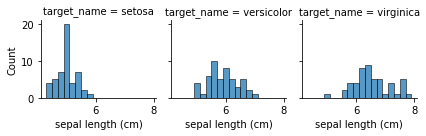

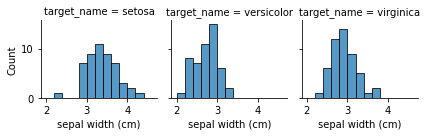

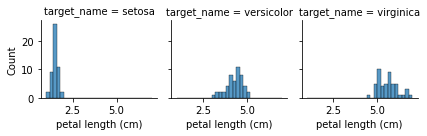

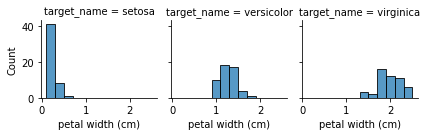

In [47]:
sns.displot(
    df, x="sepal length (cm)", col="target_name", 
    binwidth=.2, height=2,
)

sns.displot(
    df, x="sepal width (cm)", col="target_name", 
    binwidth=.2, height=2, 
)

sns.displot(
    df, x="petal length (cm)", col="target_name", 
    binwidth=.2, height=2, 
)

sns.displot(
    df, x="petal width (cm)", col="target_name", 
    binwidth=.2, height=2, 
)


In [48]:
# use the scipy function f_oneway to run a single factor anova using sepal width as the factor
f_oneway(df[df['target_name']=='setosa']['sepal width (cm)'].values,
         df[df['target_name']=='versicolor']['sepal width (cm)'].values,
         df[df['target_name']=='virginica']['sepal width (cm)'].values)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

Similar to a t-test you get a p-value, and if that p-value is small, like this one which is very small we can say that there is a difference between the two data sets in terms of means, and that the liklihood that this difference occured by chance is very low. We also get a statstic, that we use to compare against a critical value based on degrees of freedom. To see what the critical value is we can also use scipy such as shown below:

In [49]:
# double check shape to make sure we have the same number of observations in each sample to calculate degrees of freedom
print(df[df['target_name']=='setosa']['sepal width (cm)'].shape)
print(df[df['target_name']=='versicolor']['sepal width (cm)'].shape)
print(  df[df['target_name']=='virginica']['sepal width (cm)'].shape)

# alpha
alpha = .05

# degrees of freedom
dfn = df[df['target_name']=='versicolor']['sepal width (cm)'].shape[0]-2

# denominator of degrees of freedom
dfd = df[df['target_name']=='versicolor']['sepal width (cm)'].shape[0]

scipy.stats.f.ppf(q=1-alpha, dfn=dfn, dfd=dfd)

(50,)
(50,)
(50,)


1.6053180393747197

This means that if our f-statistic is greater than 1.605 we can assume that the results are statistically signficant, that compared with the low p-value we can be sure that these two classes have different distributions of sepal width.